# 컬러 이미지(PNG)를 텐서로 변환한 후 CNN 모델에 넣기

## google drive를 mount 하기

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis'

/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis


In [0]:
ls

 Bulbasaur/                'Pytorch-complete pokemon image dataset.ipynb'
 p-colorImgToTensor.ipynb   Squirtle/


In [0]:
!cd /
!ls

 Bulbasaur		   'Pytorch-complete pokemon image dataset.ipynb'
 p-colorImgToTensor.ipynb   Squirtle


In [0]:
!cd /drive
!ls
# cd /drive 와 cd / 가 같은 듯
# drive 와 cd 가 같은 듯

/bin/bash: line 0: cd: /drive: No such file or directory
 Bulbasaur		   'Pytorch-complete pokemon image dataset.ipynb'
 p-colorImgToTensor.ipynb   Squirtle


## 컬러 이미지(PNG) 하나를 읽어오기

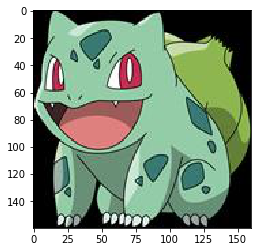

In [0]:
from PIL import Image
import os
import matplotlib.pyplot as plt
base_path = '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png'
n_file = 'Bulbasaur_1.png'
f_file = os.path.join(base_path, n_file)
img = Image.open(f_file)
plt.imshow(img)

## png를 np.ndarray로 변환하기 위해서 matplotlib.image.imread 함수를 이용한다.

In [0]:
import matplotlib.image as mpimg
ar_img = mpimg.imread(f_file)
print(type(ar_img))
print(ar_img.shape)
print(ar_img)

<class 'numpy.ndarray'>
(160, 160, 3)
[[[0.03137255 0.         0.        ]
  [0.02745098 0.         0.        ]
  [0.01568628 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.03137255 0.         0.        ]
  [0.02745098 0.         0.        ]
  [0.01568628 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.03137255 0.         0.        ]
  [0.02745098 0.         0.        ]
  [0.01568628 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]

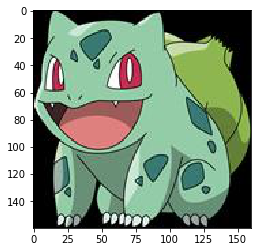

In [0]:
plt.imshow(ar_img, cmap='gray')

## 흑백으로 변환하기

(160, 160, 3)


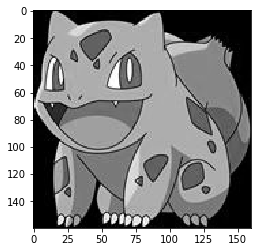

(160, 160)
<class 'torch.Tensor'>
torch.Size([160, 160])
<class 'torch.Tensor'>
torch.Size([1, 160, 160])
tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.uint8)


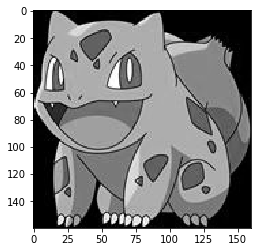

In [0]:
print(ar_img.shape)
ar_g_img = ar_img[:,:,0] + ar_img[:,:,1] + ar_img[:,:,2] ## ar_g_img : g 는 gray
plt.imshow(ar_g_img, cmap='gray')
plt.show()


## CNN 에 적용가능한 Image 의 Tensor Shape를 알아내기 위해서 MNIST 손글씨 이미지를 살펴본다. 
28x28 MNIST 손글씨 이미지의 Tensor Shape는 torch.Size([1, 28, 28]) 이다.

In [0]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=False


#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)


In [0]:
print(type(train_loader))
# print(train_loader.shape)    # 'DataLoader' object has no attribute 'shape'
print(len(train_loader))
i_lis = iter([1, 2, 3, 4])
print(type(i_lis))
for item in i_lis:
    print(item)
# a, b = iter(test_loader)
# print(a)

<class 'torch.utils.data.dataloader.DataLoader'>
60
<class 'list_iterator'>
1
2
3
4


In [0]:
target[0]

tensor(0)

i: 0
torch.Size([1, 28, 28])


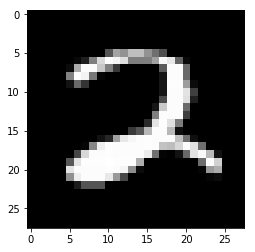

target[0]: tensor(2)
i: 1
torch.Size([1, 28, 28])


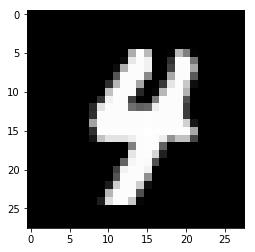

target[0]: tensor(4)
i: 2
torch.Size([1, 28, 28])


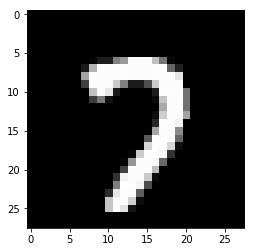

target[0]: tensor(7)
target.shape torch.Size([1000])


In [0]:
i = -1
for data, target in test_loader:
    i += 1
    if i == 3:
        break
    print('i:', i)
    print(data[0].shape)
    plt.imshow(data[0][0], cmap='gray')
    plt.show()
    
    print('target[0]:', target[0])    # target[0] 에는 숫자이미지의 label값이 들어가있다.
    
print('target.shape', target.shape)

## torch.Size([1, n, m]) 로 맞추기 위해서 Tensor.reshape 함수를 이용한다.

In [0]:
print(ar_g_img.shape)
t_g_img = torch.FloatTensor(ar_g_img)
print(type(t_g_img))
print(t_g_img.shape)

t_g_img = t_g_img.reshape(1, 160, 160)
print(type(t_g_img))
print(t_g_img.shape)

print(torch.FloatTensor(ar_g_img) == t_g_img[0])

plt.imshow(t_g_img[0], cmap='gray')
plt.show()

## 필요한 library를 import 하기

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# data를 dataloader 형태로 준비하기

## PNG to Torch.Tensor
forloop을 돌면서 디렉터리 내 모든 이미지 Tensor로 변환한다.

In [6]:
# data
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import os

base_path = '/content/drive/My Drive/computing/' +\
            'pytorch_kkj_lessons/poketmon-analysis/'
r_files = os.listdir(base_path)    ## r_files : r은 root 디렉터리를 의미함.
l_sub_path = [sub_path for sub_path in r_files \
              if len(sub_path.split('.')) == 1]  # == 1을 통해 확장자가 없는,
                                                 # 즉, 폴더만 뽑아서 l_sub_path
                                                 # 에 assign 한다.
print('l_sub_path', l_sub_path)

x_dataset = []    # y_train 은 루프 끝난 후 nb_x_train을 이용하여 assign 한다.
nb_x_dataset = []    ## nb_x_dataset : nb는 number, 개수를 의미함.
y_dataset = []
for label, sub_path in enumerate(l_sub_path):    # label은 
                                                 # Sqaurtile : 0
                                                 # Bulbasaur : 1 로 정한다.
    print('sub_path', sub_path)
    full_path = os.path.join(base_path, sub_path, 'png')    
                                        # .../poketmon-analysis/POKEMON/png
                                        ## POKEMON : Bulbasaur, Squirtle
                                        # 절대경로로 변환한다.
    files = os.listdir(full_path)
    print('full_path', full_path)
    
    
    nb_x_dataset.append(len(os.listdir(full_path)))
    l_n_file = [n_file for n_file in os.listdir(full_path) \
                if len(n_file.split('.')) != 1]  ## l_n_file : l은 list 타입,
                                                 ## n은 name을 의미함.
    index = 0    # loop 문에서 사용할 index를 정의한다.
    for n_file in l_n_file:
        index += 1    # index는 1부터 시작한다.
        f_file = os.path.join(full_path, n_file) ## f_file : f는 full path를
                                                 ## 의미함.
        print('n_file', n_file)
        

        im = Image.open(f_file)
        ar_img = mpimg.imread(f_file)    ######## arr 이름 종속성 해결해야 함.
        ar_g_img = ar_img[:,:,0] + ar_img[:,:,1] + ar_img[:,:,2] 
                                                ## ar_g_img : g 는 gray
                                                # 컬러 이미지에서 단색으로 변환
        t_g_img = torch.FloatTensor(ar_g_img)   ## t_g_img : t는 Tensor 타입을
                                                ## 의미함.
        t_g_img = t_g_img.reshape(1, 160, 160)# CNN에 적용할 수 있도록,
                                              # shape를 [1, n, m] 꼴로 변환한다.
        x_dataset.append(t_g_img)    # x_dataset 변환된 tensor를 append 한다.
        y_dataset.append(torch.LongTensor([label]))      # label 값을 y_dataset에 append 한다.
        print('i:{}, label:{}, path:{}'.format(index, label, f_file))


print(len(x_dataset))

# ratio_tra_test = 0.7
# nb_x0 = int(nb_x_train[0] * ratio_tra_test)
# nb_x1 = int(nb_x_train[1] * ratio_tra_test)
# x_train_ = np.concatenate((x_train[:nb_x0], x_train[nb_x_train[0]:nb_x_train[0]+nb_x1]))
# x_test = np.concatenate((x_train[nb_x_train[0]-nb_x0:], x_train[nb_x_train[1]+nb_x1:]))
# print(nb_x_train)

# y_train = np.concatenate((np.repeat(0, nb_x0), np.repeat(1, nb_x1)))
# y_test = np.concatenate((np.repeat(0, nb_x_train[0] - nb_x0), np.repeat(1, nb_x_train[1] - nb_x1)))
# print('y_train', y_train)
# print('y_test', y_test)
# x_train = x_train_



l_sub_path ['Squirtle', 'Bulbasaur']
sub_path Squirtle
full_path /content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png
n_file Squirtle_1.png
i:1, label:0, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_1.png
n_file Squirtle_10.png
i:2, label:0, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_10.png
n_file Squirtle_13.png
i:3, label:0, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_13.png
n_file Squirtle_17.png
i:4, label:0, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_17.png
n_file Squirtle_14.png
i:5, label:0, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_14.png
n_file Squirtle_12.png
i:6, label:0, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_1

In [0]:
int(len(x_dataset) * r_train_test)

39

## training dataset, validation dataset 나누기

In [7]:
r_train_test = 2/3    ## r_train_test : r은 ratio를 의미함.
idx = int(len(x_dataset) * r_train_test)
print('training dataset 개수: {}\nvalidation dataset 개수: {}'\
      .format(idx, len(x_dataset) - idx))
x_train = x_dataset[:idx]
y_train = y_dataset[:idx]
x_test = x_dataset[idx:]
y_test = y_dataset[idx:]

print((y_train + y_test) == y_dataset)    # >>> True
                                          # train 데이터와

training dataset 개수: 39
validation dataset 개수: 20
True


### torch.Tensor.type() 함수로 Float 인지 Long 여부 확인하기

In [0]:
print(type(x_dataset[0]))    # 내장함수 type()로는 Float 인지 Long인지 알 수 없음
print(type(y_dataset[0]))
print(x_dataset[0].type())
print(y_dataset[0].type())

print(x_train[0].type())
print(y_train[0].type())

print(x_test[0].type())
print(y_test[0].type())

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.FloatTensor
torch.LongTensor
torch.FloatTensor
torch.LongTensor
torch.FloatTensor
torch.LongTensor


## zip()함수로 data_loader 형식에 맞추기

<class 'zip'>
type x: <class 'torch.Tensor'>
target: tensor([0])


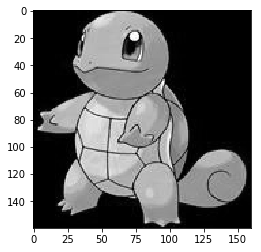

type x: <class 'torch.Tensor'>
target: tensor([0])


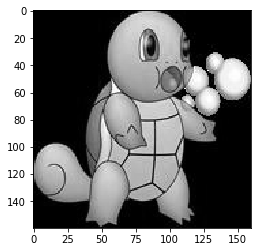

type x: <class 'torch.Tensor'>
target: tensor([0])


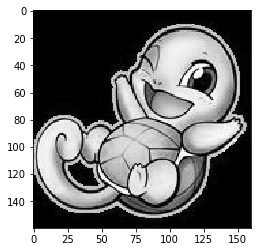

type x: <class 'torch.Tensor'>
target: tensor([0])


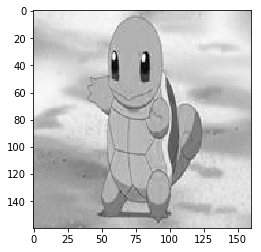

type x: <class 'torch.Tensor'>
target: tensor([0])


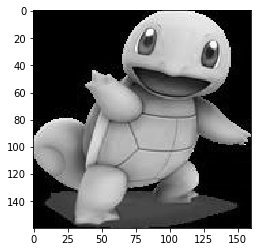

type x: <class 'torch.Tensor'>
target: tensor([0])


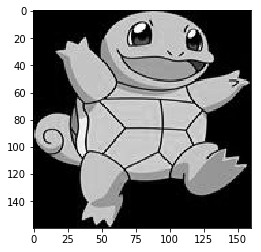

type x: <class 'torch.Tensor'>
target: tensor([0])


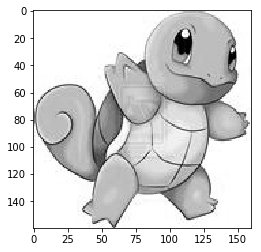

type x: <class 'torch.Tensor'>
target: tensor([0])


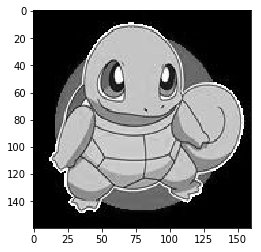

type x: <class 'torch.Tensor'>
target: tensor([0])


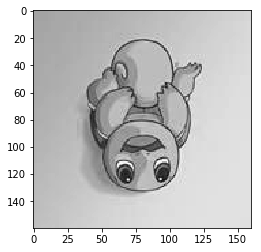

type x: <class 'torch.Tensor'>
target: tensor([0])


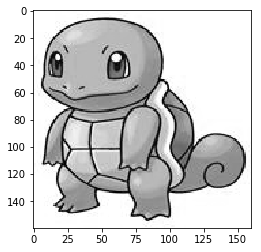

type x: <class 'torch.Tensor'>
target: tensor([0])


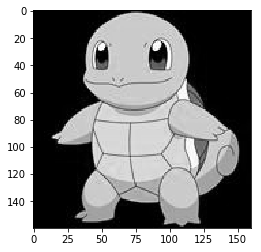

type x: <class 'torch.Tensor'>
target: tensor([0])


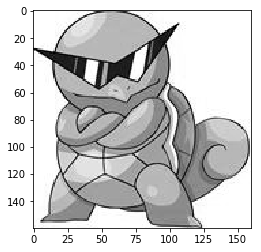

type x: <class 'torch.Tensor'>
target: tensor([0])


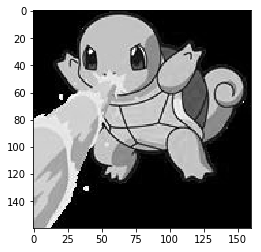

type x: <class 'torch.Tensor'>
target: tensor([0])


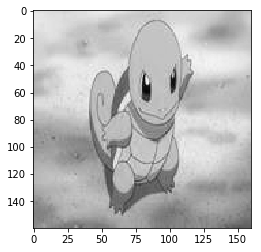

type x: <class 'torch.Tensor'>
target: tensor([0])


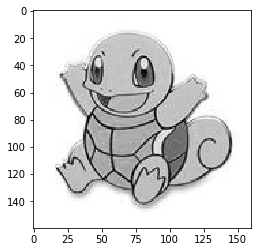

type x: <class 'torch.Tensor'>
target: tensor([0])


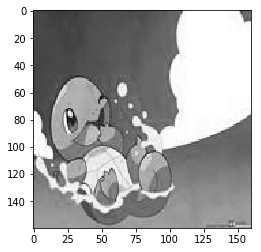

type x: <class 'torch.Tensor'>
target: tensor([0])


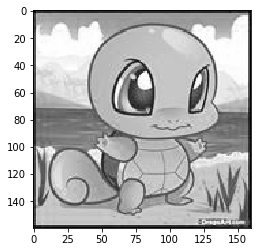

type x: <class 'torch.Tensor'>
target: tensor([0])


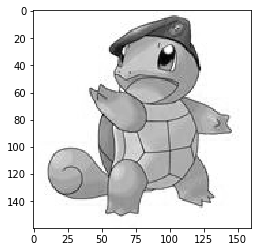

type x: <class 'torch.Tensor'>
target: tensor([0])


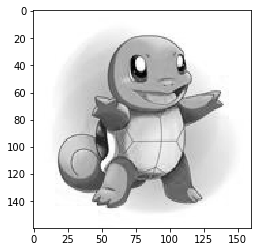

type x: <class 'torch.Tensor'>
target: tensor([0])


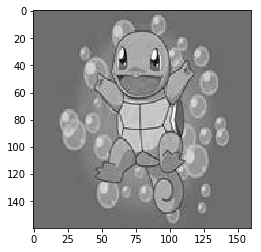

type x: <class 'torch.Tensor'>
target: tensor([0])


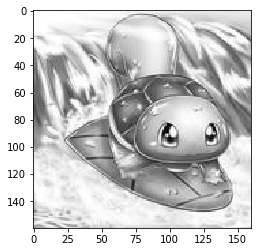

type x: <class 'torch.Tensor'>
target: tensor([0])


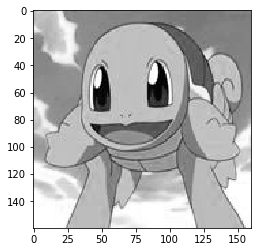

type x: <class 'torch.Tensor'>
target: tensor([0])


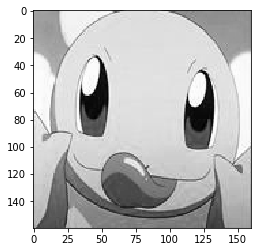

type x: <class 'torch.Tensor'>
target: tensor([0])


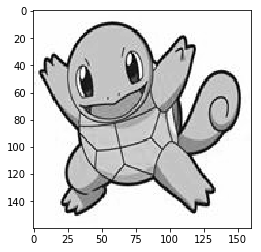

type x: <class 'torch.Tensor'>
target: tensor([0])


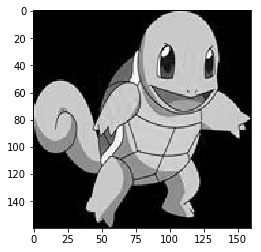

type x: <class 'torch.Tensor'>
target: tensor([0])


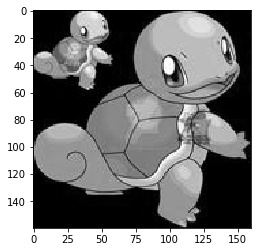

type x: <class 'torch.Tensor'>
target: tensor([0])


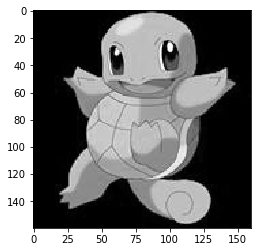

type x: <class 'torch.Tensor'>
target: tensor([0])


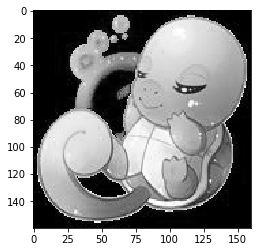

type x: <class 'torch.Tensor'>
target: tensor([0])


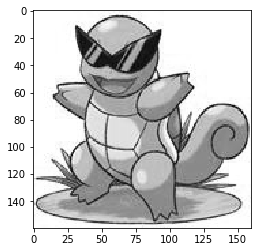

type x: <class 'torch.Tensor'>
target: tensor([0])


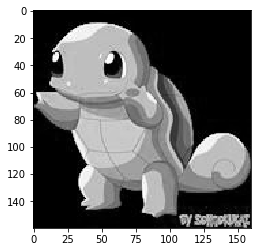

type x: <class 'torch.Tensor'>
target: tensor([0])


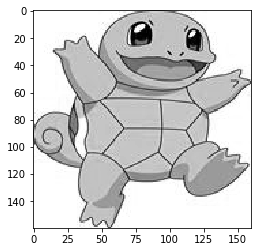

type x: <class 'torch.Tensor'>
target: tensor([1])


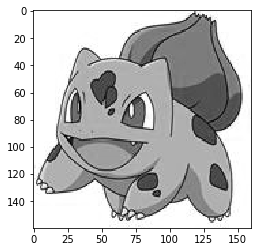

type x: <class 'torch.Tensor'>
target: tensor([1])


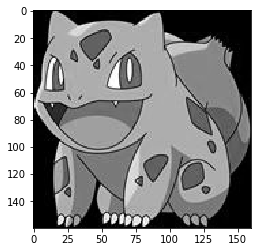

type x: <class 'torch.Tensor'>
target: tensor([1])


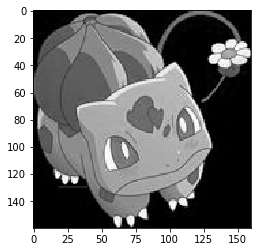

type x: <class 'torch.Tensor'>
target: tensor([1])


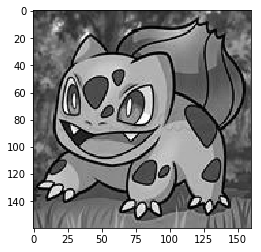

type x: <class 'torch.Tensor'>
target: tensor([1])


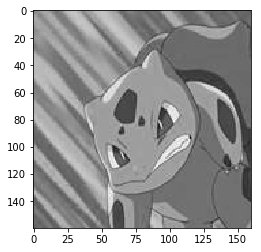

type x: <class 'torch.Tensor'>
target: tensor([1])


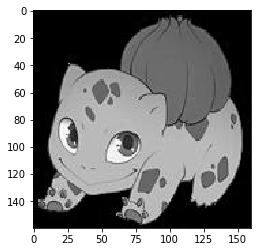

type x: <class 'torch.Tensor'>
target: tensor([1])


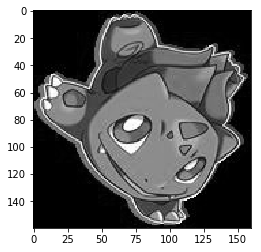

type x: <class 'torch.Tensor'>
target: tensor([1])


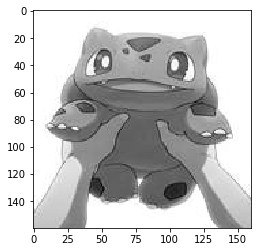

In [8]:
data_loader = zip(x_train, y_train)
print(type(data_loader))
# print(len(data_loader))
for x, y in data_loader:
    print('type x:', type(x))
    print('target:', y)
    plt.imshow(x[0], cmap='gray')
    plt.show()

<class 'zip'>
type x: <class 'torch.Tensor'>
target: tensor(1.)


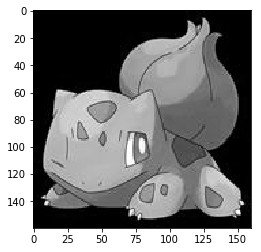

type x: <class 'torch.Tensor'>
target: tensor(1.)


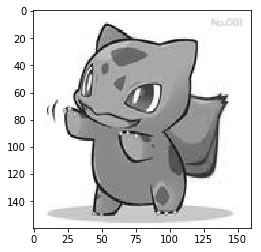

type x: <class 'torch.Tensor'>
target: tensor(1.)


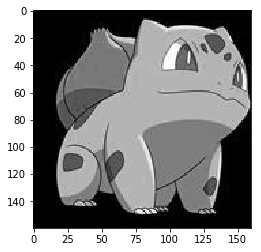

type x: <class 'torch.Tensor'>
target: tensor(1.)


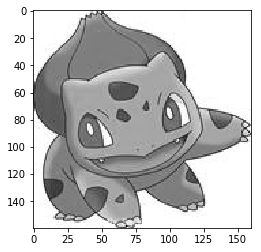

type x: <class 'torch.Tensor'>
target: tensor(1.)


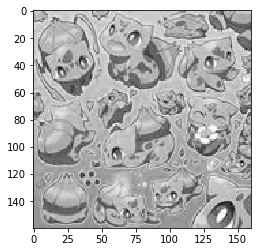

type x: <class 'torch.Tensor'>
target: tensor(1.)


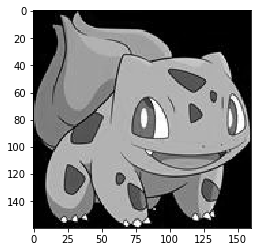

type x: <class 'torch.Tensor'>
target: tensor(1.)


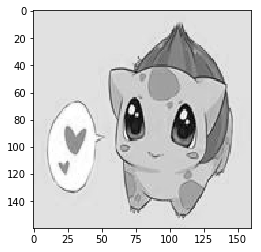

type x: <class 'torch.Tensor'>
target: tensor(1.)


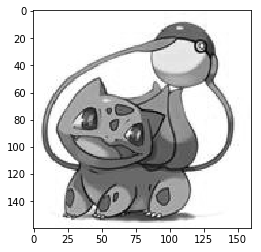

type x: <class 'torch.Tensor'>
target: tensor(1.)


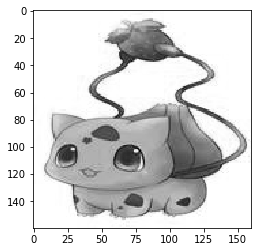

type x: <class 'torch.Tensor'>
target: tensor(1.)


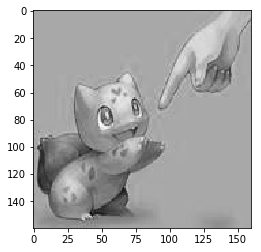

type x: <class 'torch.Tensor'>
target: tensor(1.)


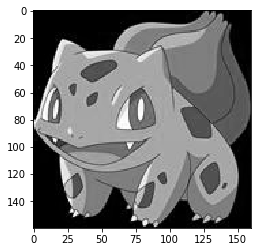

type x: <class 'torch.Tensor'>
target: tensor(1.)


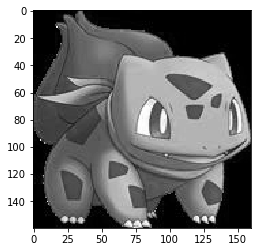

type x: <class 'torch.Tensor'>
target: tensor(1.)


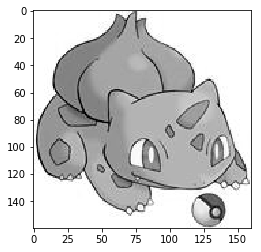

type x: <class 'torch.Tensor'>
target: tensor(1.)


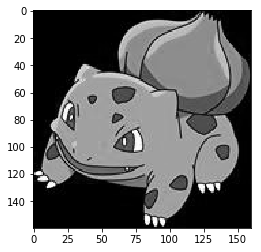

type x: <class 'torch.Tensor'>
target: tensor(1.)


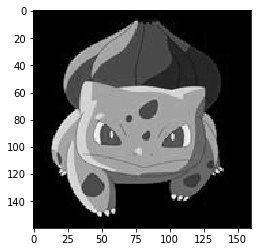

type x: <class 'torch.Tensor'>
target: tensor(1.)


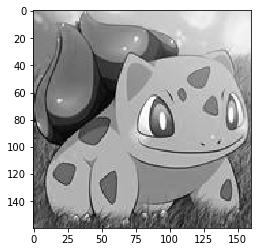

type x: <class 'torch.Tensor'>
target: tensor(1.)


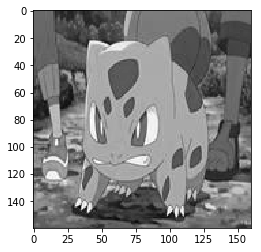

type x: <class 'torch.Tensor'>
target: tensor(1.)


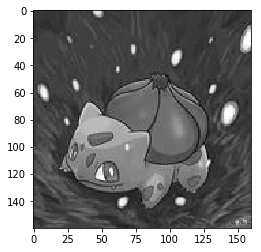

type x: <class 'torch.Tensor'>
target: tensor(1.)


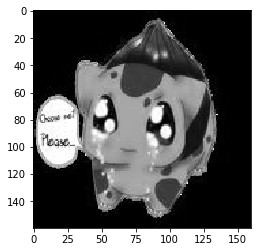

type x: <class 'torch.Tensor'>
target: tensor(1.)


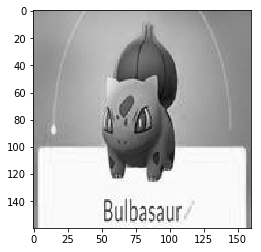

In [0]:
data_loader_test = zip(x_test, y_test)
print(type(data_loader_test))

for x, y in data_loader_test:
    print('type x:', type(x))
    print('target:', y)
    plt.imshow(x[0], cmap='gray')
    plt.show()

### enumerate(zip(list(A), list(B))) 의 for 문에서 반환 형태

In [0]:
a = range(10)
b = range(100,110)
for y, z in enumerate(zip(a,b)):
    # print(x, y, z)
    print(y, z)

0 (0, 100)
1 (1, 101)
2 (2, 102)
3 (3, 103)
4 (4, 104)
5 (5, 105)
6 (6, 106)
7 (7, 107)
8 (8, 108)
9 (9, 109)


# CNN 모델 정의, 훈련, 성능평가

## model definition

In [0]:
import torch.nn.init
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
learning_rate = 0.001
training_epochs = 15
# batch_size = 100

### CNN 의 dimension shape를 조정하고, y 값의 타입(LongTensor)로 해야 한다.

In [0]:
# CNN Model (2 conv layers)
class CNN(torch.nn.Module):
# Given groups=1, weight of size 16 3 36 36, expected input[1, 160, 160, 3] to have 3 channels, but got 160 channels instead
    def __init__(self):
        super(CNN, self).__init__()
        # L1 ImgIn shape=(?, 160, 160, 3)    # for 3 channel img
        # L1 ImgIn shape=(?, 160, 160, 1)    # for gray scale img
        #    Conv     -> (?, 32, 32, 16)
        #    Pool     -> (?, 14, 14, 16)
        
        # Expected 4-dimensional input for 4-dimensional weight 16 3 36,
        # but got 3-dimensional input of size [1, 160, 160] instead
        # >>> X.shape(-1, 1, 160, 160,) 으로 해결함.

        # Given groups=1, weight of size 16 3 36 36,
        # expected input[1, 1, 160, 160] to have 3 channels,
        # but got 1 channels instead
        # Given groups=1, weight of size 16 3 36 36,
        # >>> self.layer1#Conv2d#3 에서 1로 변경하여 해결함.

        # size mismatch, m1: [1 x 1568], m2: [3136 x 2]
        # at /pytorch/aten/src/TH/generic/THTensorMath.cpp:961
        # >>> self.fc#Linear#7*7*64,2 에서 7*7*32,2로 변경하여 해결함.

        # Expected object of scalar type Long
        # but got scalar type Float for argument #2 'target'
        # >>> y_train 의 type을 torch.FloatTensor에서 
        # torch.LongTensor로 변경하여 해결함.
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=36, stride=4, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=6, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 16)
        #    Conv      ->(?, 14, 14, 32)
        #    Pool      ->(?, 7, 7, 32)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # Final FC 7x7x64 inputs -> 2 outputs    
                                    # outputs : Squartile, Bulbasaur
        self.fc = torch.nn.Linear(7 * 7 * 32, 2, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc(out)
        return out

In [0]:
# instantiate CNN model
model = CNN().to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## training

### training code

## torch.argmax() 함수 사용방법

In [0]:
print(hypothesis)
print(torch.argmax(hypothesis, -1))
print(torch.argmax(hypothesis, 0))
print(torch.argmax(hypothesis, 1))
# print(torch.argmax(hypothesis, 2))

tensor([[ 0.6951, -0.5869]], grad_fn=<AddmmBackward>)
tensor([0])
tensor([0, 0])
tensor([0])


In [0]:
print(Y.item())
print()
list(hypothesis[0][0])
# print()

0
1


TypeError: ignored

### 모델의 예측

In [13]:
# train my model
# total_batch = len(data_loader)
# total_batch = len(t_x_train)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    idx_mini = -1
    # print(data_loader)
    
    data_loader = zip(x_train, y_train)
    for idx, data in enumerate(data_loader):
        X, Y = data
        idx_mini += 1
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        # X.reshape(-1, 1, 1, 160, 160)
        # X = [1, X]
        # X = torch.FloatTensor(X)
        X = X.view(-1, 1, 160, 160)
        
        X = X.to(device)
        Y = Y.to(device)    # pred: tensor([[ 0.6294, -0.5247]]
                            # cost 함수를 cross_entropy() 로 사용했더니,
                            # 음수값이 나오고 있다.
        optimizer.zero_grad()
        hypothesis = model(X)
        argmax = torch.argmax(hypothesis)
        cost = criterion(hypothesis, Y)
        # cost = F.cross_entropy(hypothesis, Y)
        cost.backward()
        optimizer.step()

        # avg_cost += cost / total_batch
        avg_cost += cost / training_epochs
        if idx_mini%5 == 0:
            print(idx_mini)
            # print(X.shape)
            OX = (Y.item()==argmax).item()
            print('label/pred: {}/{}, OX: {}, pred: [{:.3f}, {:.3f}]'.format(Y.item(), argmax,\
                        OX, hypothesis[0][0], hypothesis[0][1]))
            plt.imshow(X[0][0], cmap='gray')
            plt.show()
    print('Epoch:', epoch, 'avg_cost:', avg_cost)
    # print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Output hidden; open in https://colab.research.google.com to view.

## validation

In [0]:
data_loader = zip(x_train, y_train)
    for idx, data in enumerate(data_loader):
        X, Y = data
        idx_mini += 1
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        # X.reshape(-1, 1, 1, 160, 160)
        # X = [1, X]
        # X = torch.FloatTensor(X)
        X = X.view(-1, 1, 160, 160)
        
        X = X.to(device)
        Y = Y.to(device)

12


In [0]:
y_test = torch.Tensor(y_test)

In [0]:
x_test = x_test

ValueError: ignored

In [0]:
# Test model and check accuracy
with torch.no_grad():
    # X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    # Y_test = mnist_test.test_labels.to(device)
    # idx = np.random.randint(0, len(y_test))
    # print(idx)

    # x_test = 
    # y_test = 
    # X_test = x_test.to(device)
    Y_test = y_test.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

In [0]:
data_loader_test = zip(x_test, y_test)

In [0]:
print(x_test[idx])
print(x_test[idx].type())
print(y_test)
print(y_test.type())



tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0157, 0.0157],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0157, 0.0157],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0157, 0.0157],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
torch.FloatTensor
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])
torch.FloatTensor


In [0]:
idx = np.random.randint(0, len(y_test))
print(idx)
print(len(x_test))
# Test model and check accuracy
with torch.no_grad():
    # X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    # Y_test = mnist_test.test_labels.to(device)
    # idx = np.random.randint(0, len(y_test))
    # print(idx)

    # x_test = 
    # y_test = 
    X_test = x_test[idx]
    X_test = X_test.view(-1, 1, 160, 160)
    X_test = X_test.to(device)
    Y_test = y_test[idx].to(device)
    # Y_test = y_test[idx].to(device)

    prediction = model(X_test)
    pred = torch.argmax(prediction, 1)
    correct_prediction = pred == Y_test
    accuracy = correct_prediction.float().mean()
    print('Pred: {}, Accuracy: {}'.format(pred, accuracy.item()))

17
20
Pred: tensor([0]), Accuracy: 0.0
